# In-term test (25%)

In [1]:
from math import *

# Q1

The rate of infections $I$ with respect to time $t$ (measured in days) within a population is seen to be rising exponentially according to the relation:

$I =  e^{ (k-1) t} $    (Infections per day)

This occurs over a period of {t} days from time $t=[0,20]$, where $k = 1.2$.

a) What is the period of time required for the infection rate $I$ to double in number (what is $I_0$)? State answer to within 3 decimal places.

The infection rate double means $I=2*I_0$, where $I_0=1$. 

 $e^{ (k-1) t}=2$, this leads to $t=5ln(2)$

In [2]:
t=5*log(2)
print(t)

3.4657359027997265


To the nearest integer, what was the total number of infections recorded over the period of t= [0,20] days?

The total number of infection can be defined as:

$$\int {Idt = } \int {{e^{(k - 1)t}}dt = } {1 \over {k - 1}}{e^{(k - 1)t}}$$

Substitute the bounds into the integral:

$$\int_0^{20} {Idt = \int_0^{20} {{e^{(k - 1)t}}dt} }  = \left. {{1 \over {k - 1}}{e^{(k - 1)t}}} \right|_0^{20} = {1 \over {0.2}}({e^{0.2*20}} - 1)$$


In [3]:
5*(exp(4)-1)

267.9907501657212

In [4]:
exp(4)

54.598150033144236

# Q2

In [5]:
from sympy import *

In [6]:
x=Symbol('x')

In [7]:
f=2*x*sin(x**2+4)

In [8]:
a=0.4
b=0.6

In [9]:
# a) evaluate the integral
integrate(f, (x, a, b))

-0.179581429999023

In [10]:
# b)evaluate f(x), when x=0.5
def f(x):
    f=2*x*sin(x**2+4)
    return f

print(f(0.5))
    

-0.894989358228583


In [11]:
# c) differientaion

def f(x):
    return 2*x*sin(x**2+4)

def fprime(x):
    return diff(f(x),x)

DerivativeOfF = lambdify(x,fprime(x),"numpy")

print(DerivativeOfF(0.5))


-2.23606620637096


In [12]:
# d) Taylor's expansion


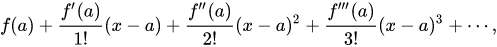

In [13]:
f(0.5)+DerivativeOfF(0.5)*(x-0.5)

0.223043744956896 - 2.23606620637096*x

# Q3

# Q4

Calculate the support reaction force and moment for the non-uniformly distributed load below, where w= 30 N/m and L= 6 m. The downward direction is denoted as positive direction in force. The anti-clockwise direction is defined as positve in moment. 

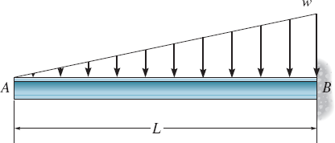

In [14]:
# Parameters
w=48  # N/m
L=5 # m

# Equavilent force
F_DL=w*L/2 # N

RB_y=-F_DL

M=-F_DL*L/3

print('Reaction force', RB_y, 'N')
print('Reaction momment', M, 'N*m')



Reaction force -120.0 N
Reaction momment -200.0 N*m


# Q5

A beam is subjected to a uniformly-distributed load by its own weight. The distributed load is quantified as $wl$. The beam has a density of $\rho=$ 7850 kg/m<sup>3</sup>, length of $l=$ 200 mm, width of $b=$ 10 mm, height of $h=$ 100 mm and Young's modulus of $E=$ 210 GPa. The gravity is $g=$ 9.81 m/s<sup>2</sup>. Now plot its shear force and moment diagram.

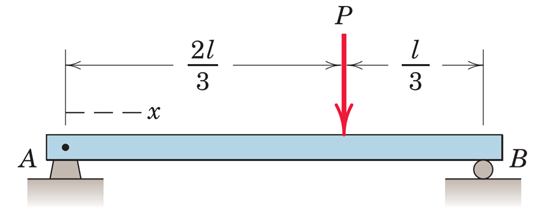

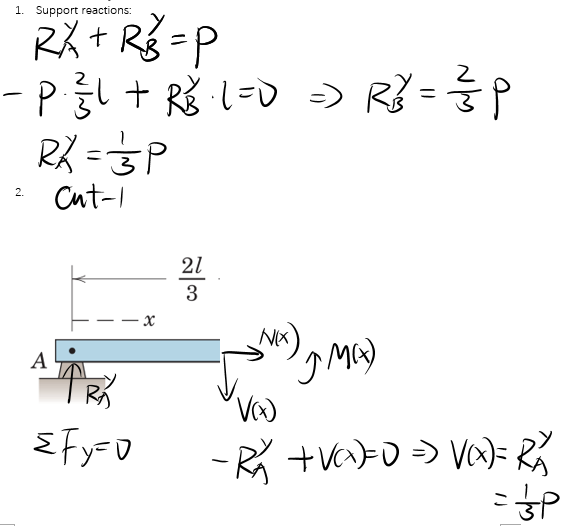

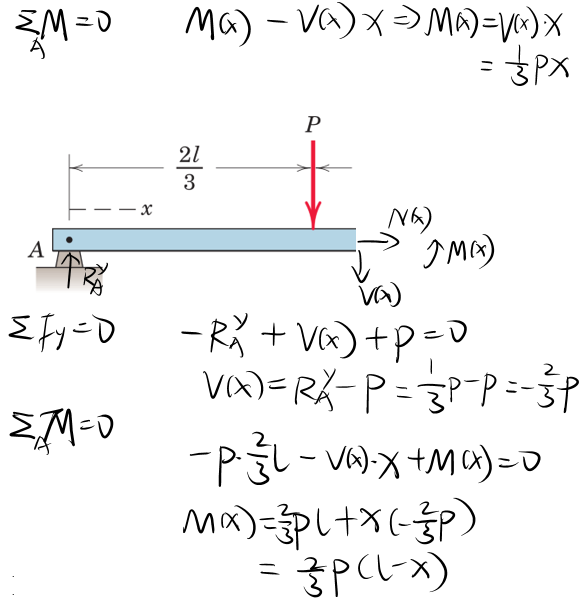

RA 1333.3333333333333
RC 2666.6666666666665
1000


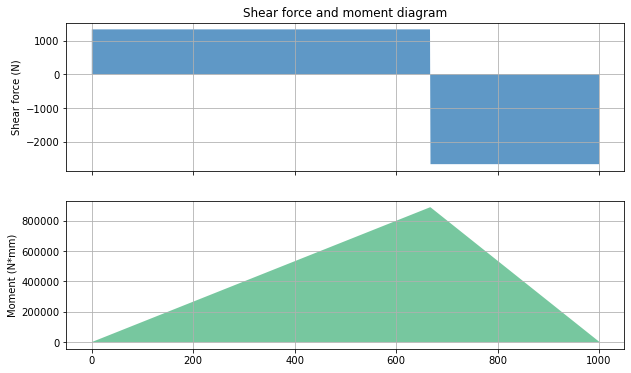

In [15]:
import numpy as np
import matplotlib.pyplot as plt

#Beam parameters, unit here MPa-mm
LAC=1000  #mm
LAB=2*LAC/3		   #mm, length
LBC=1*LAC/3      # mm, length
H=240           #mm, height
h=40            # mm 
h0=H-2*h    #mm, the height of the middle beam
B0=20  		     #mm, width
B1=75            #mm, point where load begins
B2=100          # mm

#Elastic properties
E = 210*(10**3)      #N/mm^2 (MPa)

#Applied load
w=7.0 # N/mm distributed load
P=4*1000  # N

# Moment of area
I0= (B0*h0**3)/12
I1= (B1*h**3)/12+B1*h*(h/2+h0/2)**2  # Use the parrallel theorem
I2= (B2*h**3)/12+B2*h*(h/2+h0/2)**2  # Use the parrallel theorem
I = I0+I1+I2     #Second moment of area for square cross section

#Reactions 
RA=1*P/3   #Vertical reaction force at the support A
RC=2*P/3 #Vertical reaction force at the support C
print('RA', RA)
print('RC', RC)

#Shear and Bending arrays
# There are three parts of the shear force and momemnt diagrams
# Cut-1
X=np.linspace(0,LAC,num=LAC, endpoint=True)
print(len(X))
V=np.zeros(LAC)
M=np.zeros(LAC)

for x in range(0, LAC):
    if x<=LAB:
        V[x]=1*P/3
        M[x]=1*P/3*x
    else:
        V[x]=-2*P/3
        M[x]=2*P/3*(LAC-x)

# # wrong results
# for x in range(0, LAC):
#     if x<=LAB:
#         V[x]=1*P/3
#         M[x]=-1*P/3*x
#     else:
#         V[x]=-2*P/3
#         M[x]=-2*P/3*(LAC-x)

# y=(1/float (E*I))*(-(m1/2)*x**2+(r1/6)*x**3-(w/24)*(x>=a)*x**4)

#Max Values
if abs(max(V))>=abs(min(V)):
    maxV=max(V)
else:
    maxV=min(V)

if abs(max(M))>=abs(min(M)):
    maxM=max(M)
else:
    maxM=min(M)    
# maxy=min(y)

#Diagrams plot
textstr1 = 'max=%.2f (N)'%(maxV)
textstr2 = 'max=%.2f (N*mm)'%(maxM)
# textstr3 = 'max=%.5f (mm)'%(maxy)
props = dict(boxstyle='round', facecolor='white')


fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10, 6))

# fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True, figsize=(10, 6))

ax1.fill_between(X, 0, V, facecolor='#377EB8', alpha=0.8)
ax1.set_ylabel('Shear force (N)')
# ax1.text(0.78, 0.9, textstr1, transform=ax1.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
ax1.set_title('Shear force and moment diagram')
ax1.grid (True)

ax2.fill_between(X, 0, M, facecolor='#55BA87', alpha=0.8)
ax2.set_ylabel('Moment (N*mm)')
# ax2.text(0.68, 0.2, textstr2, transform=ax2.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
ax2.grid (True)

# Add the deflection diagram
# ax3.fill_between(x, 0, y, facecolor='#7E1137', alpha=0.8)
# ax3.set_ylabel('Deflection')
# ax3.set_xlabel('Beam lenght axis')
# ax3.text(0.02, 0.2, textstr3, transform=ax3.transAxes, fontsize=14,
#         verticalalignment='top', bbox=props)
# ax3.grid (True)

plt.show()
#plt.savefig('beam.pdf', format='svg', dpi=1200)

# Q6

The beam shown in the figure below is subjected to a resultant internal vertical shear force of $V =$ {V} N and moment $M=$ {M} N*m.

(a) Determine the 2nd moment of area. 
(b) Determine the maximum bending stress in the beam.
(c) Compute the maximum shear stress in the beam.


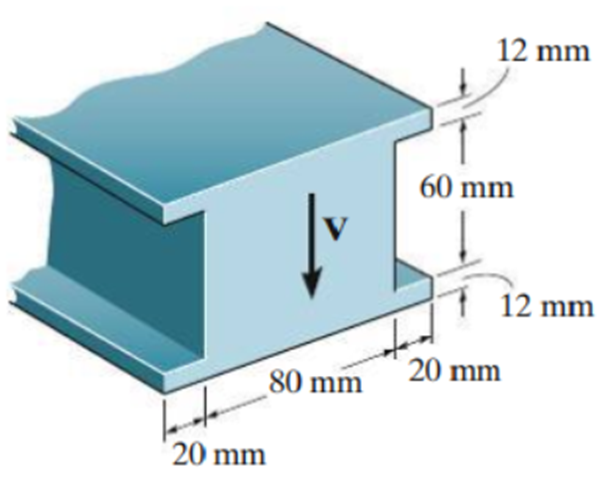

In [16]:
## Your code ## 
H = 60+12+12 # height (mm)
h = 60 ##mm
t_f = 12 # thickness of horizontal section (mm)
t_w = 80 # thickness of vertical section (mm)
W = 120 # width of horizontal section (mm)
E = 200000 # Modulus (MPa)
sigma_y = 300 # yield strength (MPa)

In [17]:
# ## Your code ## 
# H = 200+20+20 # height (mm)
# h = 200 ##mm
# t_f = 20 # thickness of horizontal section (mm)
# t_w = 15 # thickness of vertical section (mm)
# W = 300 # width of horizontal section (mm)
# E = 200000 # Modulus (MPa)
# sigma_y = 300 # yield strength (MPa)

In [18]:
## Load ##
V= 60000 # N
M= 5000 # N*m

#### Calculating $I_{x}$, where $x$ is the horizontal direction

$ I_{total} = \sum (\bar{I}_i+A_id_i^2) \\
\bar{I}_i = \frac{bh^3}{12}$

$I_i$ is the second moment of area for each segment, $A_i$ is the area of each segment, $d_i$ is the distance from the centroid of each segment to the neutral axis, $b$ is the width of each segment and $h$ is the height of each segment.

In [28]:
# Segment 1
A1 = t_f*W
d1 = (H/2)-(t_f/2)
I1x = (W*(t_f)**3/12) + (A1*(d1)**2)
print(I1x,'mm^4')

1883520.0 mm^4


In [29]:
# Segment 2
I2x = t_w*(H-2*t_f)**3/12 
print(I2x, 'mm^4')

1440000.0 mm^4


In [30]:
# Segment 3
A3 = t_f*W
d3 = (H/2)-(t_f/2)
I3x = W*(t_f)**3/12 + A3*(d3)**2
print(I3x,'mm^4')

1883520.0 mm^4


In [27]:
# Total
I_x = I1x + I2x + I3x
print(I_x,'mm^4')

5207040.0 mm^4


In [23]:
# Maxium bending stress
SigmaB=(M*10**3)*(H/2)/I_x  # N/mm^2 = MPa
print('SigmaB=', SigmaB, 'MPa')

SigmaB= 44.08504635227731 MPa


In [24]:
# Maxium shear stress
Qc=(h/2+t_f/2)*W*t_f+h/4*h/2*t_w
Tau=V*Qc/I_x/t_w  # N/mm^2 = MPa
print('Qc=', Qc, 'mm^3')
print('Tau=', Tau, 'MPa')

Qc= 87840.0 mm^3
Tau= 13.830108827085851 MPa


In [25]:
(H/2+t_f/2)*W*t_f

69120.0

In [26]:
(H/2+t_f/2)

48.0